# California's Wildfires in Graphs and Charts

### This Notebook will contain charts and graphs featuring information from a dataset of California wildfires from 2013-2020

This notebook will detail a table of number ofwildfires by county and a graph of wildfires by year. I will be using my notebook 'Wildfire Incidents Data Exploration' as well as lab two and three as my guide.

In [1]:
import geopandas as gpd

/opt/conda/lib/python3.9/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('California_Fire_Incidents.csv')

In [4]:
CAWildfires = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.Longitude, df.Latitude))

In [5]:
type(CAWildfires)

geopandas.geodataframe.GeoDataFrame

I'm also going to import a few other libraries for this

In [6]:
import contextily as ctx
import matplotlib.pyplot as plt

In [7]:
pd.set_option('display.max_rows', None)

In [8]:
pd.set_option('display.max_rows', 500)
CAWildfires.head(500)

,AcresBurned,Active,AdminUnit,AirTankers,ArchiveYear,CalFireIncident,CanonicalUrl,ConditionStatement,ControlStatement,Counties,...,Started,Status,StructuresDamaged,StructuresDestroyed,StructuresEvacuated,StructuresThreatened,UniqueId,Updated,WaterTenders,geometry
0,257314.0,False,Stanislaus National Forest/Yosemite National Park,NaN,2013,True,/incidents/2013/8/17/rim-fire/,NaN,NaN,Tuolumne,...,2013-08-17T15:25:00Z,Finalized,NaN,NaN,NaN,NaN,5fb18d4d-213f-4d83-a179-daaf11939e78,2013-09-06T18:30:00Z,NaN,POINT (-120.08600 37.85700)
1,30274.0,False,USFS Angeles National Forest/Los Angeles Count...,NaN,2013,True,/incidents/2013/5/30/powerhouse-fire/,NaN,NaN,Los Angeles,...,2013-05-30T15:28:00Z,Finalized,NaN,NaN,NaN,NaN,bf37805e-1cc2-4208-9972-753e47874c87,2013-06-08T18:30:00Z,NaN,POINT (-118.42318 34.58559)
2,27531.0,False,CAL FIRE Riverside Unit / San Bernardino Natio...,NaN,2013,True,/incidents/2013/7/15/mountain-fire/,NaN,NaN,Riverside,...,2013-07-15T13:43:00Z,Finalized,NaN,NaN,NaN,NaN,a3149fec-4d48-427c-8b2c-59e8b79d59db,2013-07-30T18:00:00Z,NaN,POINT (-116.72885 33.70950)
3,27440.0,False,Tahoe National Forest,NaN,2013,False,/incidents/2013/8/10/american-fire/,NaN,NaN,Placer,...,2013-08-10T16:30:00Z,Finalized,NaN,NaN,NaN,NaN,8213f5c7-34fa-403b-a4bc-da2ace6e6625,2013-08-30T08:00:00Z,NaN,POINT (-120.65000 39.12000)
4,24251.0,False,Ventura County Fire/CAL FIRE,NaN,2013,True,/incidents/2013/5/2/springs-fire/,Acreage has been reduced based upon more accur...,NaN,Ventura,...,2013-05-02T07:01:00Z,Finalized,6.0,10.0,NaN,NaN,46731fb8-3350-4920-bdf7-910ac0eb715c,2013-05-11T06:30:00Z,11.0,POINT (0.00000 0.00000)
5,22992.0,False,Sierra National Forest,NaN,2013,False,/incidents/2013/7/22/aspen-fire/,NaN,NaN,Fresno,...,2013-07-22T22:15:00Z,Finalized,NaN,NaN,NaN,NaN,bee8c339-4f26-4b78-a5b4-a8a0ebdb8786,2013-09-24T20:15:00Z,NaN,POINT (-119.31800 37.27900)
6,20292.0,False,CAL FIRE Riverside Unit / San Bernardino Natio...,NaN,2013,True,/incidents/2013/8/7/silver-fire/,Firefighters closed the containment lines toda...,Hwy 243 remains closed between Twin Pines Road...,Riverside,...,2013-08-07T14:05:00Z,Finalized,8.0,40.0,NaN,NaN,c400203b-a7fd-4bd8-803a-f3c74bc32a2b,2013-08-12T18:00:00Z,20.0,POINT (-116.90427 33.86157)
7,14754.0,False,Klamath National Forest,NaN,2013,False,/incidents/2013/7/31/salmon-river-complex/,NaN,NaN,Siskiyou,...,2013-07-31T22:00:00Z,Finalized,NaN,NaN,NaN,NaN,ba76c009-09c9-497c-b923-1ac8cf05c20d,2013-08-31T06:45:00Z,NaN,POINT (-123.17600 41.32000)
8,12503.0,False,Six Rivers National Forest,NaN,2013,False,/incidents/2013/8/10/corral-complex/,NaN,NaN,Humboldt,...,2013-08-10T11:40:00Z,Finalized,NaN,NaN,NaN,NaN,f3dcbca8-f8ed-46d0-8f6e-9c7fc2fb03e6,2013-08-12T12:00:00Z,NaN,POINT (-123.48800 41.03500)
9,11429.0,False,CAL FIRE Tehama-Glenn Unit,NaN,2013,True,/incidents/2013/8/23/deer-fire/,Fire suppression repair will continue througho...,NaN,Tehama,...,2013-08-23T14:15:00Z,Finalized,NaN,NaN,NaN,NaN,956dbcf6-db40-4b61-b235-4ede14738f1e,2013-08-29T16:45:00Z,8.0,POINT (-121.85397 40.04263)


I didn't mean to set it to 500 rows but it's fine. From here I am going to trim the columns down. Afterwards, I want to create geometry points for those wildfires that don't have coordinates.

In [9]:
CAWildfires.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1636 entries, 0 to 1635
Data columns (total 41 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   AcresBurned           1633 non-null   float64 
 1   Active                1636 non-null   bool    
 2   AdminUnit             1636 non-null   object  
 3   AirTankers            28 non-null     float64 
 4   ArchiveYear           1636 non-null   int64   
 5   CalFireIncident       1636 non-null   bool    
 6   CanonicalUrl          1636 non-null   object  
 7   ConditionStatement    284 non-null    object  
 8   ControlStatement      111 non-null    object  
 9   Counties              1636 non-null   object  
 10  CountyIds             1636 non-null   object  
 11  CrewsInvolved         171 non-null    float64 
 12  Dozers                123 non-null    float64 
 13  Engines               191 non-null    float64 
 14  Extinguished          1577 non-null   object  
 

In [10]:
desired_columns = ['AcresBurned', 'AdminUnit', 'ArchiveYear', 'CalFireIncident', 'Counties', 'CountyIds','Extinguished','Fatalities','Latitude','Longitude','MajorIncident','Name','Started','StructuresDamaged','StructuresDestroyed','StructuresThreatened','geometry']

In [11]:
CAWildfires[desired_columns].sample(5)

,AcresBurned,AdminUnit,ArchiveYear,CalFireIncident,Counties,CountyIds,Extinguished,Fatalities,Latitude,Longitude,MajorIncident,Name,Started,StructuresDamaged,StructuresDestroyed,StructuresThreatened,geometry
1256,50.0,CAL FIRE Lake-Napa Unit,2018,True,Lake,17,2019-01-04T09:38:00Z,NaN,38.911520,-122.868540,True,Carder Fire,2018-07-21T14:40:00Z,NaN,1.0,NaN,POINT (-122.86854 38.91152)
1571,34.0,CAL FIRE Riverside Unit,2019,True,Riverside,33,NaN,NaN,33.854597,-117.270144,False,Redwood Fire,2019-09-12T20:30:41Z,NaN,NaN,NaN,POINT (-117.27014 33.85460)
1337,12.0,"CAL FIRE Amador, El Dorado Unit",2018,True,El Dorado,9,2019-01-04T09:03:00Z,NaN,38.744800,-120.656720,True,Meyers Fire,2018-09-20T12:39:00Z,NaN,4.0,NaN,POINT (-120.65672 38.74480)
841,70.0,CAL FIRE Sonoma-Lake-Napa Unit,2017,True,Colusa,6,2018-01-09T11:58:00Z,NaN,39.012240,-122.201270,True,Sand Fire,2017-07-17T13:17:00Z,NaN,NaN,NaN,POINT (-122.20127 39.01224)
783,136.0,CAL FIRE Amador-El Dorado Unit,2017,True,El Dorado,9,2018-01-09T13:21:00Z,NaN,38.575800,-120.915000,True,French Fire,2017-09-17T15:18:00Z,NaN,NaN,NaN,POINT (-120.91500 38.57580)


In [12]:
WF_Trimmed = CAWildfires[desired_columns].copy()

In [13]:
WF_Trimmed

,AcresBurned,AdminUnit,ArchiveYear,CalFireIncident,Counties,CountyIds,Extinguished,Fatalities,Latitude,Longitude,MajorIncident,Name,Started,StructuresDamaged,StructuresDestroyed,StructuresThreatened,geometry
0,257314.0,Stanislaus National Forest/Yosemite National Park,2013,True,Tuolumne,55,2013-09-06T18:30:00Z,NaN,37.857000,-120.086000,False,Rim Fire,2013-08-17T15:25:00Z,NaN,NaN,NaN,POINT (-120.08600 37.85700)
1,30274.0,USFS Angeles National Forest/Los Angeles Count...,2013,True,Los Angeles,19,2013-06-08T18:30:00Z,NaN,34.585595,-118.423176,False,Powerhouse Fire,2013-05-30T15:28:00Z,NaN,NaN,NaN,POINT (-118.42318 34.58559)
2,27531.0,CAL FIRE Riverside Unit / San Bernardino Natio...,2013,True,Riverside,33,2013-07-30T18:00:00Z,NaN,33.709500,-116.728850,False,Mountain Fire,2013-07-15T13:43:00Z,NaN,NaN,NaN,POINT (-116.72885 33.70950)
3,27440.0,Tahoe National Forest,2013,False,Placer,31,2013-08-30T08:00:00Z,NaN,39.120000,-120.650000,False,American Fire,2013-08-10T16:30:00Z,NaN,NaN,NaN,POINT (-120.65000 39.12000)
4,24251.0,Ventura County Fire/CAL FIRE,2013,True,Ventura,56,2013-05-11T06:30:00Z,NaN,0.000000,0.000000,True,Springs Fire,2013-05-02T07:01:00Z,6.0,10.0,NaN,POINT (0.00000 0.00000)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1631,9.0,CAL FIRE / Riverside County Fire,2019,True,Riverside,33,2019-10-10T18:11:00Z,NaN,33.827979,-117.499619,False,Eagle Fire,2019-10-10T12:08:00Z,NaN,NaN,NaN,POINT (-117.49962 33.82798)
1632,2.0,CAL FIRE Nevada-Yuba-Placer Unit,2019,True,Nevada,29,2019-06-28T17:33:00Z,NaN,39.409722,-121.000556,False,Long Fire,2019-06-28T15:03:04Z,NaN,NaN,NaN,POINT (-121.00056 39.40972)
1633,NaN,Yolo County Fire Protection District,2019,False,Yolo,57,NaN,NaN,38.734634,-121.729691,False,Cashe Fire,2019-11-25T12:02:02Z,NaN,NaN,NaN,POINT (-121.72969 38.73463)
1634,NaN,Camp Pendleton Marine Corps Base,2019,False,San Diego,37,NaN,NaN,33.351145,-117.403719,False,Oak Fire,2019-10-22T19:20:44Z,NaN,NaN,NaN,POINT (-117.40372 33.35115)


There are a few wildfires that need to be dropped so I'm going to do that now. I ~think~ that since I convert to a geodataframe, I can still map those wildfires that don't listed as (0,0). I hope. That's just a realization I had...but I can't recall if that's correct. 

Right now though, I'm just going to create a table that shows the number wildfires by county. Afterwards, I'll be making a bar graph that shows the number of wildfires by year.

In [14]:
# dropping State of Oregon and State of Nevada, Mexico points, and points that aren't in California proper.
WF_Trimmed = WF_Trimmed.drop([1423])
WF_Trimmed = WF_Trimmed.drop([1424])
WF_Trimmed = WF_Trimmed.drop([1421])
WF_Trimmed = WF_Trimmed.drop([1590])
WF_Trimmed = WF_Trimmed.drop([113])
WF_Trimmed = WF_Trimmed.drop([165])
WF_Trimmed = WF_Trimmed.drop([627])

## Number of Wildfires by County

In [15]:
WF_Trimmed.shape

(1629, 17)

In [16]:
WF_Trimmed.columns.to_list()

['AcresBurned',
 'AdminUnit',
 'ArchiveYear',
 'CalFireIncident',
 'Counties',
 'CountyIds',
 'Extinguished',
 'Fatalities',
 'Latitude',
 'Longitude',
 'MajorIncident',
 'Name',
 'Started',
 'StructuresDamaged',
 'StructuresDestroyed',
 'StructuresThreatened',
 'geometry']

In [17]:
wildfire_count = WF_Trimmed['Counties'].value_counts()

In [18]:
wildfire_count = wildfire_count.reset_index()

In [19]:
type(wildfire_count)

pandas.core.frame.DataFrame

In [20]:
wildfire_count.columns.to_list

<bound method IndexOpsMixin.tolist of Index(['index', 'Counties'], dtype='object')>

In [21]:
wildfire_count.columns = ['Counties', 'Number of Wildfires']

In [22]:
wildfire_count

,Counties,Number of Wildfires
0,Riverside,145
1,San Diego,89
2,Butte,66
3,San Luis Obispo,64
4,Shasta,64
5,Kern,62
6,Fresno,57
7,Siskiyou,55
8,San Bernardino,53
9,Tehama,51


This output will be turned into a nicer table to present later. Unlike first exploration of the data, I didn't drop any duplicates or drop any of the wildfires without geometry coordinates (which I'm realizing I probably shouldn't have done....)

I chose to do this as a table because I feel like it would be little unwieldy as a bar graph.

## Number of wildfires by year

I'm creating another value counts dataframe for this. 

To make it easier to understand though, I'm going to rename one of columns. ArchiveYear will become Year.

In [23]:
list(df)

['AcresBurned',
 'Active',
 'AdminUnit',
 'AirTankers',
 'ArchiveYear',
 'CalFireIncident',
 'CanonicalUrl',
 'ConditionStatement',
 'ControlStatement',
 'Counties',
 'CountyIds',
 'CrewsInvolved',
 'Dozers',
 'Engines',
 'Extinguished',
 'Fatalities',
 'Featured',
 'Final',
 'FuelType',
 'Helicopters',
 'Injuries',
 'Latitude',
 'Location',
 'Longitude',
 'MajorIncident',
 'Name',
 'PercentContained',
 'PersonnelInvolved',
 'Public',
 'SearchDescription',
 'SearchKeywords',
 'Started',
 'Status',
 'StructuresDamaged',
 'StructuresDestroyed',
 'StructuresEvacuated',
 'StructuresThreatened',
 'UniqueId',
 'Updated',
 'WaterTenders',
 'geometry']

Hmmm this is the original column list...

In [24]:
list(WF_Trimmed)

['AcresBurned',
 'AdminUnit',
 'ArchiveYear',
 'CalFireIncident',
 'Counties',
 'CountyIds',
 'Extinguished',
 'Fatalities',
 'Latitude',
 'Longitude',
 'MajorIncident',
 'Name',
 'Started',
 'StructuresDamaged',
 'StructuresDestroyed',
 'StructuresThreatened',
 'geometry']

In [25]:
WF_Trimmed.columns = ['Acres Burned',
 'AdminUnit',
 'Year',
 'CalFire Incident',
 'Counties',
 'CountyIds',
 'Date Extinguished',
 'Fatalities',
 'Latitude',
 'Longitude',
 'Major Incident',
 'Name of Fire',
 'Date Started',
 'Structures Damaged',
 'Structures Destroyed',
 'Structures Threatened',
 'geometry']

In [26]:
wildfire_count_yr = WF_Trimmed['Year'].value_counts()

In [27]:
wildfire_count_yr = wildfire_count_yr.reset_index()

In [28]:
type(wildfire_count_yr)

pandas.core.frame.DataFrame

In [29]:
wildfire_count.columns.to_list

<bound method IndexOpsMixin.tolist of Index(['Counties', 'Number of Wildfires'], dtype='object')>

Woops. Wrong one.

In [30]:
wildfire_count_yr.columns.to_list

<bound method IndexOpsMixin.tolist of Index(['index', 'Year'], dtype='object')>

In [31]:
wildfire_count_yr.columns = ['Year', 'Number of Wildfires']

In [32]:
wildfire_count_yr

,Year,Number of Wildfires
0,2017,437
1,2018,316
2,2019,262
3,2016,185
4,2013,161
5,2015,152
6,2014,116


Yes! This is great. Let me see if I can put the years in order. 

In [33]:
wildfire_count_yr = wildfire_count_yr.sort_values(by='Year', ascending=True)
wildfire_count_yr

,Year,Number of Wildfires
4,2013,161
6,2014,116
5,2015,152
3,2016,185
0,2017,437
1,2018,316
2,2019,262


Well 2017 was terrible.

Text(0.5, 1.0, 'Number of Wildfires Per Year from 2013 to 2020')

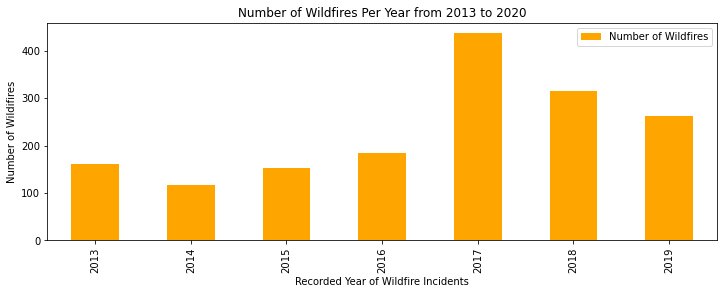

In [36]:
fig, ax = plt.subplots(figsize=(12, 4))

wildfire_count_yr.plot.bar(ax=ax,
                           x='Year',
                           y='Number of Wildfires',
                           color='orange'
                          )

ax.set_xlabel('Recorded Year of Wildfire Incidents')
ax.set_ylabel('Number of Wildifires')
ax.set_title("Number of Wildfires Per Year from 2013 to 2020")